In [1]:
import gct

In [2]:
import numpy as np
import pandas as pd
def make_graph(n_cluster, cluster_size, inner_degree, inter_degree):
    assert inner_degree  < cluster_size
    assert inter_degree  < cluster_size
    name = "SIMPLE_ud_wu_nc{}_cz{}_in{}_it{}".format(n_cluster, cluster_size, inner_degree, inter_degree)
    if gct.local_graph_exists(name):
        return
    def make_index_clusters():
        index_clusters=[]
        i=0
        for ic in range(n_cluster):
            ids=[]
            for j in range(cluster_size):
                ids.append(i)
                i+=1
            index_clusters.append(ids)
        return index_clusters

    def make_inner_edges(index):
        l=set()
        for i in index:
            ll=set()
            while(len(ll)<inner_degree):
                j = np.random.choice(index, 1, replace=False)[0]
                if(i!=j):
                    if (i>j):
                        ll.update([(j,i)])
                    else:
                        ll.update([(i,j)])
            l.update(ll)
        return list(l)
        
    def make_inter_edges(index1,index2):
        l=set()
        while len(l)<inter_degree:
            i = np.random.choice(index1, 1, replace=False)[0]
            j = np.random.choice(index2, 1, replace=False)[0]
            if(i!=j):
                if (i>j):
                    l.update([(j,i)])
                else:
                    l.update([(i,j)])
        return list(l)
    
    
    index_clusters=make_index_clusters()
    gt={}
    for i,vv in enumerate(index_clusters):
        for v in vv:
            gt[v]=i+1

    gt=pd.Series(gt).to_frame().reset_index()
    gt.columns=['node', 'cluster']
    
    edges=[]
    for index in index_clusters:
        edges+=make_inner_edges(index)
    
    print("#edge=",len(edges))
    
    for i in range(len(index_clusters)):
        for j in range(i+1, len(index_clusters)):
            edges+=make_inter_edges(index_clusters[i],index_clusters[j])
    
    print("#edge=",len(edges))
    
    df=pd.DataFrame(edges,columns=['src','dest'])
    
    g=gct.dataset.create_dataset(name,df,directed=False,weighted=False, overide=False,groundtruthObj=gt)
    return g


In [3]:
N=1024
cluster_sizes=[4,8,16,32,64,128,256]

In [ ]:
i=0
frac=0.7
for cluster_size in cluster_sizes:
    n_cluster=int(N/cluster_size)
    inner_degree=int(cluster_size*0.9)
    while inner_degree >=3:
        inter_degree=int(inner_degree*0.9)
        while(inter_degree>=1):
            print(N, n_cluster,cluster_size,inter_degree,inner_degree)
            g=make_graph(n_cluster, cluster_size, inner_degree, inter_degree)
            i+=1
            inter_degree=int(inter_degree*frac)
        inner_degree=int(inner_degree*frac)
        
        


In [8]:
print(N, n_cluster,cluster_size,inter_degree,inner_degree)

1024 4 256 0 2


In [5]:
gct.remove_data('SIMPLE_ud_wu_nc4_cz256_in2_it0',dry_run=False)

2020-05-02 22:35:50,658 - Dataset:SIMPLE_ud_wu_nc4_cz256_in4_it1 - INFO - writing edges to /data/data/SIMPLE_ud_wu_nc4_cz256_in4_it1/edges.txt
INFO:Dataset:SIMPLE_ud_wu_nc4_cz256_in4_it1:writing edges to /data/data/SIMPLE_ud_wu_nc4_cz256_in4_it1/edges.txt
2020-05-02 22:35:51,283 - Dataset:SIMPLE_ud_wu_nc4_cz256_in4_it1 - INFO - finish writing /data/data/SIMPLE_ud_wu_nc4_cz256_in4_it1/edges.txt
INFO:Dataset:SIMPLE_ud_wu_nc4_cz256_in4_it1:finish writing /data/data/SIMPLE_ud_wu_nc4_cz256_in4_it1/edges.txt


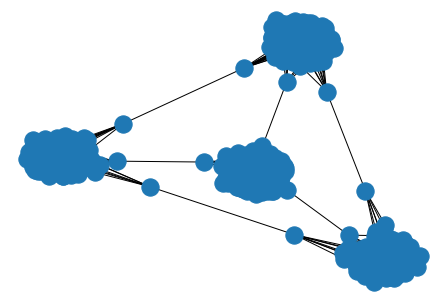

In [6]:
if 1:
    import networkx as nx
    ng=g.to_graph_networkx()
    pos = nx.spring_layout(ng)
    nx.draw(ng,with_labels=False, pos=pos)

In [7]:
for u in nx.connected_components(ng):
    print(len(u))

1024
